In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../checkpoints/400_epoch_log.csv')
data1 = pd.read_csv('../checkpoints/ood/400_epoch_log.csv')
data2 = pd.read_csv('./MLP_loss.csv')

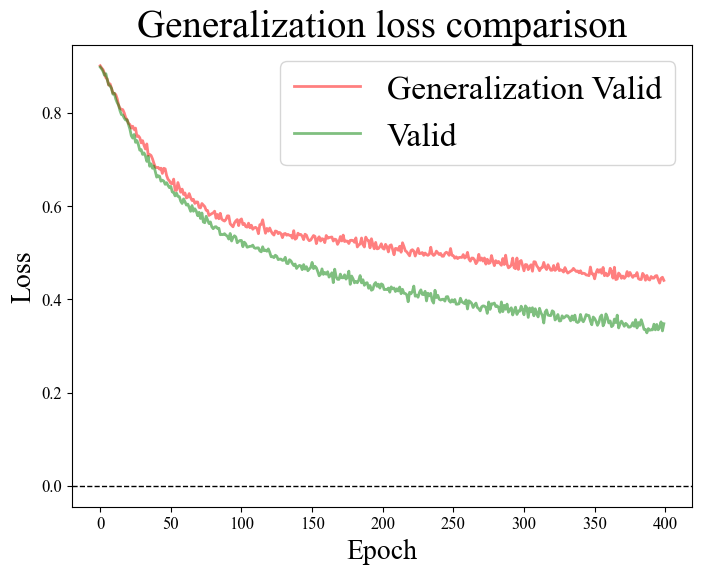

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, 400)
y1 = data1['valid_error']
y2 = data['valid_error']
# 计算移动平均值
window_size = 10
window = np.ones(window_size) / float(window_size)
y_smooth = np.convolve(y1, window, 'same')

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y1, alpha=0.5, color='red', linewidth=2, label='Generalization Valid')
ax.plot(x, y2, alpha=0.5, color='green', linewidth=2, label='Valid')
# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('Generalization loss comparison', fontsize=28)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='best', fontsize=24)

plt.show()

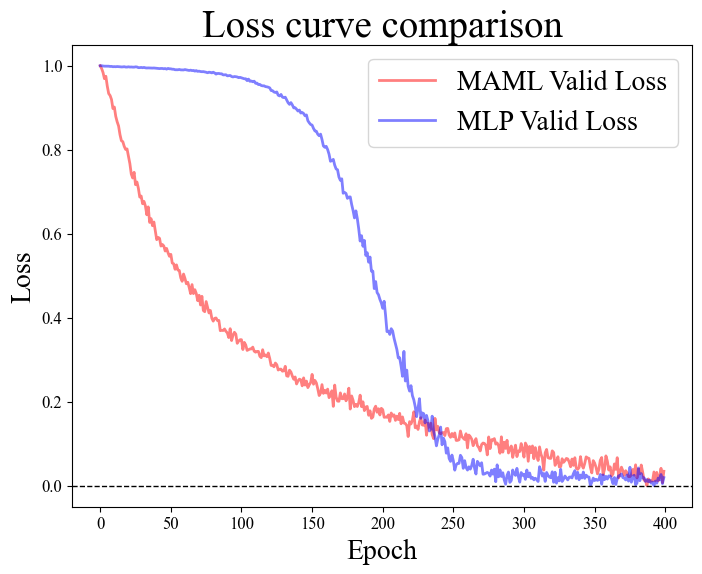

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, 400)
y1 = data['train_error']
y2 = data['valid_error']
y3 = data2['train_error']
y4 = data2['valid_error']
y1 = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))
y2 = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2))
y3 = (y3 - np.min(y3)) / (np.max(y3) - np.min(y3))
y4 = (y4 - np.min(y4)) / (np.max(y4) - np.min(y4))
# 绘图
fig, ax = plt.subplots(figsize=(8, 6))

# ax.plot(x, y1, alpha=0.5, color='red', linewidth=2, label='Train')
ax.plot(x, y2, alpha=0.5, color='red', linewidth=2, label='MAML Valid Loss')

# ax.plot(x, y3, alpha=0.5, color='gold', linewidth=2, label='Train')
ax.plot(x, y4, alpha=0.5, color='blue', linewidth=2, label='MLP Valid Loss')

# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('Loss curve comparison', fontsize=28)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='best', fontsize=20)

plt.show()

In [5]:
data=pd.read_csv('./MAML_label.csv')
data

,Predict,GroundTruth
0,14252.853,14813.347324
1,62381.997,72244.222920
2,59972.889,71025.572913
3,16997.133,18124.342181
4,32224.176,38846.208411
...,...,...
75,29295.540,34837.137952
76,59167.452,72207.623124
77,64591.020,72485.035985
78,58910.796,63752.156693


In [6]:
x = data['Predict'].values
y = data['GroundTruth'].values

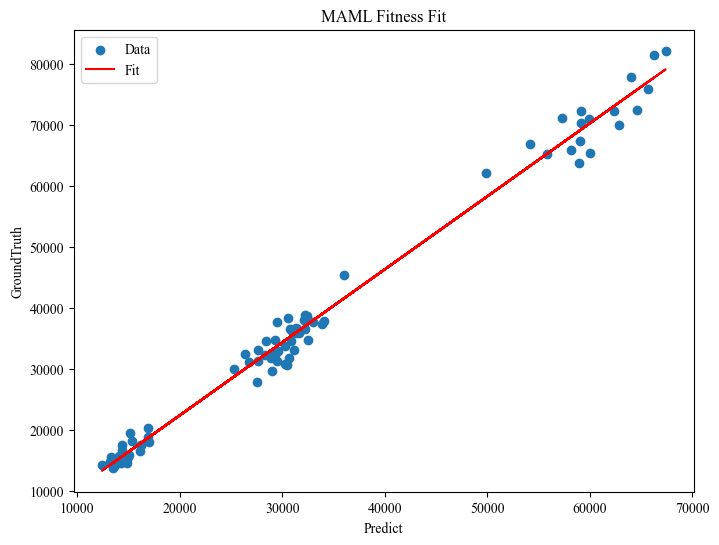

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
x = data['Predict'].values
y = data['GroundTruth'].values
# 回归分析
coef = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coef)
y_fit = fit_fn(x)
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label='Fit')
plt.xlabel('Predict')
plt.ylabel('GroundTruth')
plt.title('MAML Fitness Fit')
plt.legend()
plt.show()

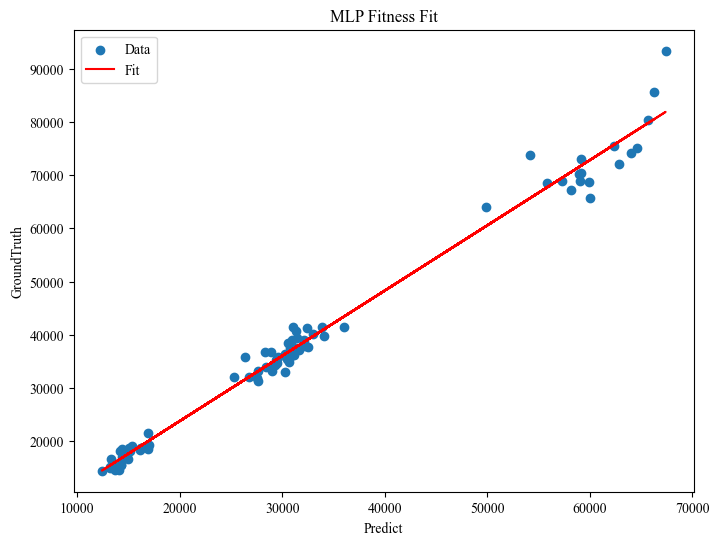

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('./MLP_label.csv')
data
# 生成数据
x = data['Predict'].values
y = data['GroundTruth'].values
# 回归分析
coef = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coef)
y_fit = fit_fn(x)
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label='Fit')
plt.xlabel('Predict')
plt.ylabel('GroundTruth')
plt.title('MLP Fitness Fit')
plt.legend()
plt.show()